# 프로젝트 실습 #3 AC 공조기 모터

## I. Classification: XGB

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('.././data/Vibration_10k_20210810.csv')
df.head()

,Date,Filename,Label_No,Label,Motor,WATT,AMP,AbsMax,AbsMean,P2P,...,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
0,2020-12-22 12:51:00,STFMK-20201105-LW19-2505_20201222_125100_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.026590,0.005515,0.050972,...,1.251851,4.821622,0.000473,0.000134,0.000471,0.000063,0.000912,0.001581,0.005084,0.000166
1,2020-12-01 16:48:26,STFMK-20201105-LW19-2505_20201201_164826_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.028149,0.005643,0.054799,...,1.246948,4.988097,0.000406,0.000369,0.000226,0.000100,0.000254,0.000652,0.000338,0.000806
2,2020-12-01 14:58:56,STFMK-20201105-LW19-2505_20201201_145856_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.030902,0.005924,0.056936,...,1.252201,5.216847,0.000455,0.000190,0.000210,0.000086,0.000417,0.001986,0.003727,0.000164
3,2020-12-02 14:45:53,STFMK-20201105-LW19-2505_20201202_144553_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.026827,0.006019,0.053333,...,1.243275,4.456839,0.000491,0.000251,0.000338,0.000080,0.000452,0.000269,0.006807,0.000222
4,2020-12-02 15:53:20,STFMK-20201105-LW19-2505_20201202_155320_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.028728,0.005612,0.054520,...,1.251593,5.118594,0.000323,0.000321,0.000362,0.000045,0.000358,0.001625,0.003675,0.000164


In [5]:
df.shape

(10000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      10000 non-null  object 
 1   Filename  10000 non-null  object 
 2   Label_No  10000 non-null  int64  
 3   Label     10000 non-null  object 
 4   Motor     10000 non-null  object 
 5   WATT      10000 non-null  float64
 6   AMP       10000 non-null  float64
 7   AbsMax    10000 non-null  float64
 8   AbsMean   10000 non-null  float64
 9   P2P       10000 non-null  float64
 10  RMS       10000 non-null  float64
 11  Skewness  10000 non-null  float64
 12  Kurtosis  10000 non-null  float64
 13  Crest     10000 non-null  float64
 14  Shape     10000 non-null  float64
 15  Impulse   10000 non-null  float64
 16  1x        10000 non-null  float64
 17  2x        10000 non-null  float64
 18  3x        10000 non-null  float64
 19  4x        10000 non-null  float64
 20  1xB       10000 non-null  flo

## 2. 데이터 탐색

In [7]:
df['Label'].value_counts()

정상        4612
벨트느슨함     1654
축정렬불량     1337
베어링불량     1243
회전체불평형    1154
Name: Label, dtype: int64

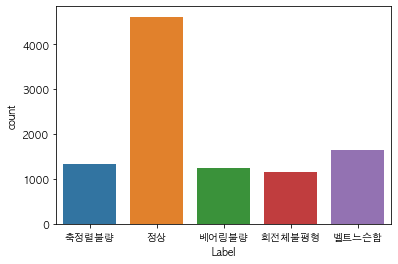

In [8]:
sns.countplot(df['Label'])
plt.show()

In [9]:
df['WATT'].value_counts().sort_index()

2.20     2092
3.70     1201
3.75      308
5.50     1242
7.50      121
11.00    1358
15.00     841
18.50     714
22.00     854
30.00     253
37.00     323
55.00     693
Name: WATT, dtype: int64

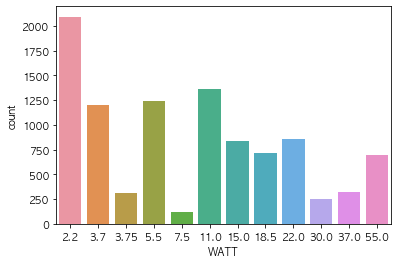

In [10]:
sns.countplot(df['WATT'])
plt.show()

### 2-1 DateTime 내림차순

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('Date').sort_index()
df.head()

,Filename,Label_No,Label,Motor,WATT,AMP,AbsMax,AbsMean,P2P,RMS,...,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-25 14:01:00,STFMK-20201105-LW19-3423_20201125_140100_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.054116,0.011482,0.092395,0.014053,...,1.223906,4.713012,0.021590,0.002832,0.000747,0.000476,0.000814,0.000405,0.000370,0.000278
2020-11-25 14:05:06,STFMK-20201105-LW19-3423_20201125_140506_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.051435,0.011649,0.088863,0.014295,...,1.227197,4.415492,0.021702,0.002757,0.000674,0.000674,0.000993,0.000407,0.000258,0.000224
2020-11-25 14:06:12,STFMK-20201105-LW19-3423_20201125_140612_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.046130,0.012619,0.085221,0.015276,...,1.210515,3.655473,0.021162,0.002808,0.000938,0.000420,0.000507,0.000395,0.000217,0.000176
2020-11-25 14:06:24,STFMK-20201105-LW19-3423_20201125_140624_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.053497,0.011505,0.093581,0.014059,...,1.221968,4.649777,0.021820,0.002246,0.000765,0.000583,0.000961,0.000614,0.000276,0.000347
2020-11-25 14:07:03,STFMK-20201105-LW19-3054_20201125_140703_004.dat,0,정상,L-PAHU-02S,37.0,71.1,0.073671,0.014504,0.123645,0.017763,...,1.224668,5.079276,0.000268,0.002277,0.000215,0.000851,0.000442,0.000774,0.000115,0.000496


### 2-2 결측치 확인 및 처리

In [12]:
df.isnull().sum()

Filename    0
Label_No    0
Label       0
Motor       0
WATT        0
AMP         0
AbsMax      0
AbsMean     0
P2P         0
RMS         0
Skewness    0
Kurtosis    0
Crest       0
Shape       0
Impulse     0
1x          0
2x          0
3x          0
4x          0
1xB         0
2xB         0
3xB         0
4xB         0
dtype: int64

In [13]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Filename    0
Label_No    0
Label       0
Motor       0
WATT        0
AMP         0
AbsMax      0
AbsMean     0
P2P         0
RMS         0
Skewness    0
Kurtosis    0
Crest       0
Shape       0
Impulse     0
1x          0
2x          0
3x          0
4x          0
1xB         0
2xB         0
3xB         0
4xB         0
dtype: int64

### 2-3 Feature Engineering

In [14]:
df.drop(['Filename', 'Label', 'Motor', 'AMP'], axis=1, inplace=True)
df.head()

,Label_No,WATT,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,Crest,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
Date,,,,,,,,,,,,,,,,,,,
2020-11-25 14:01:00,0,11.0,0.054116,0.011482,0.092395,0.014053,-0.142563,2.606448,6.574603,1.223906,4.713012,0.021590,0.002832,0.000747,0.000476,0.000814,0.000405,0.000370,0.000278
2020-11-25 14:05:06,0,11.0,0.051435,0.011649,0.088863,0.014295,-0.129078,2.538691,6.216188,1.227197,4.415492,0.021702,0.002757,0.000674,0.000674,0.000993,0.000407,0.000258,0.000224
2020-11-25 14:06:12,0,11.0,0.046130,0.012619,0.085221,0.015276,-0.144933,2.386880,5.578775,1.210515,3.655473,0.021162,0.002808,0.000938,0.000420,0.000507,0.000395,0.000217,0.000176
2020-11-25 14:06:24,0,11.0,0.053497,0.011505,0.093581,0.014059,-0.124687,2.511421,6.656225,1.221968,4.649777,0.021820,0.002246,0.000765,0.000583,0.000961,0.000614,0.000276,0.000347
2020-11-25 14:07:03,0,37.0,0.073671,0.014504,0.123645,0.017763,-0.180152,2.612526,6.960855,1.224668,5.079276,0.000268,0.002277,0.000215,0.000851,0.000442,0.000774,0.000115,0.000496


In [15]:
df.corr()

,Label_No,WATT,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,Crest,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
Label_No,1.000000,0.222583,-0.065870,-0.048620,-0.065396,-0.057780,0.060906,-0.058971,-0.024352,-0.066337,-0.043544,-0.081619,-0.051557,-0.041787,-0.052554,0.012929,-0.046821,-0.010413,-0.005310
WATT,0.222583,1.000000,0.036495,0.058671,0.045969,0.039244,-0.046643,-0.005965,0.088607,0.006986,0.044823,-0.056088,-0.019483,-0.015212,0.029805,0.200470,-0.038699,-0.013358,0.187694
AbsMax,-0.065870,0.036495,1.000000,0.831231,0.997736,0.879922,-0.844266,0.787288,0.705900,0.844193,0.804303,0.695675,0.874416,0.527097,0.912636,0.858157,0.791422,0.888727,0.882857
AbsMean,-0.048620,0.058671,0.831231,1.000000,0.833297,0.993171,-0.648420,0.483292,0.404759,0.685137,0.520434,0.518757,0.769262,0.774388,0.592558,0.635503,0.655355,0.813867,0.821486
P2P,-0.065396,0.045969,0.997736,0.833297,1.000000,0.879858,-0.843823,0.781939,0.715161,0.847075,0.805197,0.696461,0.865318,0.518415,0.910006,0.854480,0.801714,0.890336,0.885531
RMS,-0.057780,0.039244,0.879922,0.993171,0.879858,1.000000,-0.705352,0.554456,0.467646,0.741712,0.586133,0.533668,0.802896,0.764623,0.657780,0.679467,0.692887,0.845531,0.853316
Skewness,0.060906,-0.046643,-0.844266,-0.648420,-0.843823,-0.705352,1.000000,-0.959636,-0.853931,-0.982657,-0.964959,-0.563789,-0.664799,-0.387193,-0.724843,-0.672087,-0.686486,-0.747005,-0.748757
Kurtosis,-0.058971,-0.005965,0.787288,0.483292,0.781939,0.554456,-0.959636,1.000000,0.852109,0.930105,0.966691,0.579280,0.620681,0.234149,0.736952,0.657500,0.640944,0.665634,0.657831
Crest,-0.024352,0.088607,0.705900,0.404759,0.715161,0.467646,-0.853931,0.852109,1.000000,0.825034,0.946374,0.429820,0.516279,0.149750,0.671197,0.589152,0.613234,0.612617,0.611172
Shape,-0.066337,0.006986,0.844193,0.685137,0.847075,0.741712,-0.982657,0.930105,0.825034,1.000000,0.937760,0.510168,0.668411,0.436762,0.701793,0.644006,0.713676,0.764596,0.767946


In [16]:
X = df.drop('Label_No', axis=1)
y = df['Label_No']

In [17]:
# Standardization
X = (X - X.mean()) / X.std()

## 3. Train/Testset 분리

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True,
                                                    random_state=0)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 18)
(7000,)
(3000, 18)
(3000,)


## 4. XGBoost Classifier 기본 학습

In [20]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[10:22:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 5. Multi-Classification Report

In [21]:
y_pred = xgb.predict(X_test)
target_names = ['0', '1', '2', '3', '4']
print('##', XGBClassifier)
print(classification_report(y_test, y_pred, target_names=target_names, digits=4)) 

## <class 'xgboost.sklearn.XGBClassifier'>
              precision    recall  f1-score   support

           0     0.9986    0.9964    0.9975      1389
           1     1.0000    1.0000    1.0000       372
           2     1.0000    0.9943    0.9971       351
           3     0.9875    1.0000    0.9937       396
           4     0.9980    0.9980    0.9980       492

    accuracy                         0.9973      3000
   macro avg     0.9968    0.9977    0.9973      3000
weighted avg     0.9974    0.9973    0.9973      3000



In [22]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('예측 정확도: {0:.4f}'.format(accuracy))

예측 정확도: 0.9973


<Figure size 504x504 with 0 Axes>

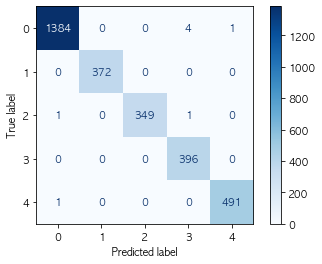

In [23]:
plt.figure(figsize=(7, 7))
plot_confusion_matrix(xgb, X_test, y_test,
                      cmap=plt.cm.Blues)
plt.show()

## 6. 학습모델 추출 to Pickle

In [24]:
import pickle
import joblib

joblib.dump(xgb, 'vibration_xgb.pkl')

['vibration_xgb.pkl']

## 7. Inference

In [25]:
xgb_joblib = joblib.load('vibration_xgb.pkl') 
y_pred = xgb_joblib.predict(X_test[:10])
print(*y_pred, sep='\n')

2
0
0
3
0
1
4
4
0
0


# II. Anomaly Detection: CNN Autoencoder

In [26]:
import numpy as np
import pandas as pd
import glob
import os

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.6.0'

In [28]:
df_normal = df.loc[df['Label_No'] == 0].iloc[:, 2:]
df_normal

,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,Crest,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
Date,,,,,,,,,,,,,,,,,
2020-11-25 14:01:00,0.054116,0.011482,0.092395,0.014053,-0.142563,2.606448,6.574603,1.223906,4.713012,0.021590,0.002832,0.000747,0.000476,0.000814,0.000405,0.000370,0.000278
2020-11-25 14:05:06,0.051435,0.011649,0.088863,0.014295,-0.129078,2.538691,6.216188,1.227197,4.415492,0.021702,0.002757,0.000674,0.000674,0.000993,0.000407,0.000258,0.000224
2020-11-25 14:06:12,0.046130,0.012619,0.085221,0.015276,-0.144933,2.386880,5.578775,1.210515,3.655473,0.021162,0.002808,0.000938,0.000420,0.000507,0.000395,0.000217,0.000176
2020-11-25 14:06:24,0.053497,0.011505,0.093581,0.014059,-0.124687,2.511421,6.656225,1.221968,4.649777,0.021820,0.002246,0.000765,0.000583,0.000961,0.000614,0.000276,0.000347
2020-11-25 14:07:03,0.073671,0.014504,0.123645,0.017763,-0.180152,2.612526,6.960855,1.224668,5.079276,0.000268,0.002277,0.000215,0.000851,0.000442,0.000774,0.000115,0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26 13:56:08,0.051351,0.010746,0.090373,0.013122,-0.102131,2.547163,6.887367,1.221062,4.778596,0.019273,0.004546,0.000335,0.000637,0.000579,0.001220,0.000239,0.000162
2020-12-26 14:56:32,0.049762,0.011479,0.093155,0.014009,-0.139252,2.542827,6.649879,1.220337,4.334970,0.021180,0.004645,0.000446,0.000323,0.000751,0.000996,0.000346,0.000183
2020-12-26 15:53:21,0.050011,0.011062,0.090215,0.013480,-0.109898,2.535240,6.692540,1.218612,4.521061,0.020287,0.004590,0.000396,0.000633,0.000488,0.000621,0.000225,0.000317


In [29]:
df_test = X

In [30]:
mean = df_normal.mean()
std = df_normal.std()
df_train= (df_normal - mean) / std
print("Number of training samples:", len(df_train))

Number of training samples: 4612


In [31]:
df_train.shape

(4612, 17)

In [32]:
TIME_STEPS = 60

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


train = create_sequences(df_train)
print("Training input shape: ", train.shape)

Training input shape:  (4552, 60, 17)


In [33]:
model = keras.Sequential(
    [
        layers.Input(shape=(train.shape[1], train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 30, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 30, 16)            1808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 16)            0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 60, 32)            3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 60, 1)             2

In [34]:
history = model.fit(
    train,
    train,
    epochs=100,
    batch_size=256,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
16/16 [==============================] - 1s 30ms/step - loss: 0.9836 - val_loss: 0.8559
Epoch 2/100
16/16 [==============================] - 0s 19ms/step - loss: 0.9297 - val_loss: 0.8095
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 0.8951 - val_loss: 0.7787
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 0.8727 - val_loss: 0.7645
Epoch 5/100
16/16 [==============================] - 0s 19ms/step - loss: 0.8608 - val_loss: 0.7565
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 0.8528 - val_loss: 0.7518
Epoch 7/100
16/16 [==============================] - 0s 18ms/step - loss: 0.8474 - val_loss: 0.7483
Epoch 8/100
16/16 [==============================] - 0s 18ms/step - loss: 0.8434 - val_loss: 0.7456
Epoch 9/100
16/16 [==============================] - 0s 20ms/step - loss: 0.8402 - val_loss: 0.7436
Epoch 10/100
16/16 [==============================] - 0s 19ms/step - loss: 0.8375 - val_loss: 0.7422

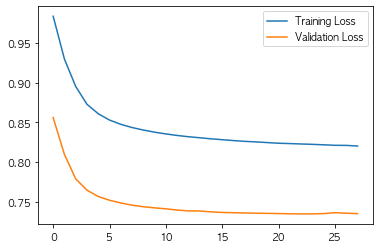

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

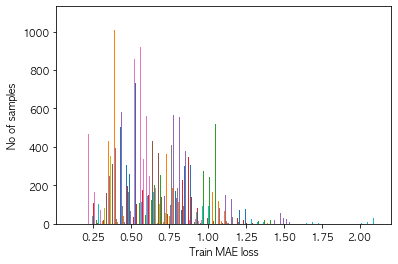

Reconstruction error threshold:  2.107302747872903


In [36]:
# Get train MAE loss.
train_pred = model.predict(train)
train_mae_loss = np.mean(np.abs(train_pred - train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

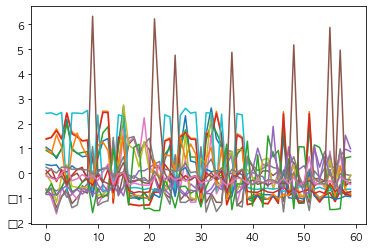

In [37]:
import matplotlib.pyplot as plt

# Checking how the first sequence is learnt
plt.plot(train[0])
plt.plot(train_pred[0])
plt.show()

In [38]:
df_test = (X_test.iloc[:, 1:] - mean) / std
print("Number of training samples:", len(df_train))

test = create_sequences(df_test)
print("Test input shape: ", test.shape)

Number of training samples: 4612
Test input shape:  (2940, 60, 17)


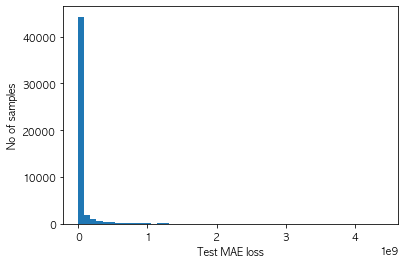

Number of anomaly samples:  49980
Indices of anomaly samples:  (array([    0,     1,     2, ..., 49977, 49978, 49979]),)
Normal:  0


In [54]:
threshold = threshold
test_pred = model.predict(test, verbose=0)
test_mae_loss = np.mean(np.abs(test_pred - test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
normal = test_mae_loss <= threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))
print("Normal: ", np.sum(normal))

In [40]:
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(X_test) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

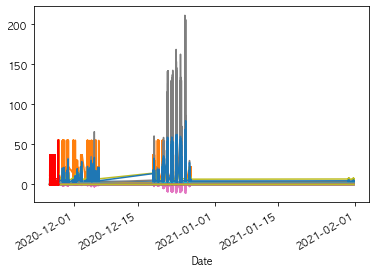

In [41]:
df_subset = df.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

# III. Anomaly Detection: LSTM Autoencoder

In [42]:
model = keras.Sequential(
    [
        layers.Input(shape=(train.shape[1], train.shape[2])),
        layers.LSTM(
            50, activation='relu'
        ),
        layers.RepeatVector(train.shape[1]),
        layers.LSTM(
            50, activation='relu', return_sequences=True
        ),
        layers.TimeDistributed(layers.Dense(1))
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                13600     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
time_distributed (TimeDistri (None, 60, 1)             51        
Total params: 33,851
Trainable params: 33,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(
    train,
    train,
    epochs=100,
    batch_size=256,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
16/16 [==============================] - 3s 113ms/step - loss: 1.0609 - val_loss: 0.9066
Epoch 2/100
16/16 [==============================] - 2s 97ms/step - loss: 0.9752 - val_loss: 0.8892
Epoch 3/100
16/16 [==============================] - 2s 96ms/step - loss: 0.9785 - val_loss: 0.8896
Epoch 4/100
16/16 [==============================] - 1s 93ms/step - loss: 0.9736 - val_loss: 0.8851
Epoch 5/100
16/16 [==============================] - 2s 95ms/step - loss: 0.9714 - val_loss: 0.8844
Epoch 6/100
16/16 [==============================] - 1s 93ms/step - loss: 0.9700 - val_loss: 0.8858
Epoch 7/100
16/16 [==============================] - 2s 112ms/step - loss: 0.9688 - val_loss: 0.8831
Epoch 8/100
16/16 [==============================] - 2s 98ms/step - loss: 0.9689 - val_loss: 0.8822
Epoch 9/100
16/16 [==============================] - 1s 94ms/step - loss: 0.9678 - val_loss: 0.8826
Epoch 10/100
16/16 [==============================] - 1s 93ms/step - loss: 0.9676 - val_loss: 0.88

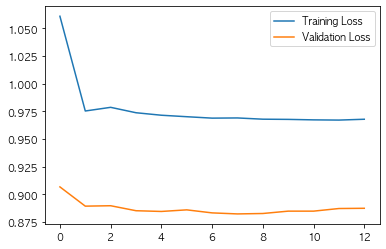

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

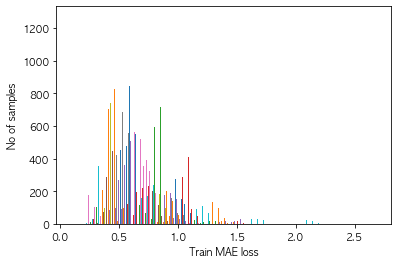

Reconstruction error threshold:  2.68584779316768


In [45]:
# Get train MAE loss.
train_pred = model.predict(train)
train_mae_loss = np.mean(np.abs(train_pred - train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

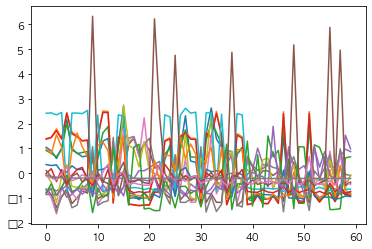

In [46]:
import matplotlib.pyplot as plt

# Checking how the first sequence is learnt
plt.plot(train[0])
plt.plot(train_pred[0])
plt.show()

In [47]:
df_test = (X_test.iloc[:, 1:] - mean) / std
print("Number of training samples:", len(df_train))
test = create_sequences(df_test)
print("Test input shape: ", test.shape)

Number of training samples: 4612
Test input shape:  (2940, 60, 17)


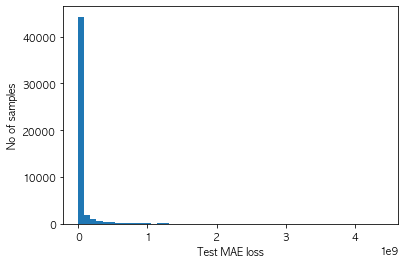

Number of anomaly samples:  49980
Indices of anomaly samples:  (array([    0,     1,     2, ..., 49977, 49978, 49979]),)
Normal:  0


In [51]:
threshold = 1.25
test_pred = model.predict(test, verbose=0)
test_mae_loss = np.mean(np.abs(test_pred - test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
normal = test_mae_loss <= threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))
print("Normal: ", np.sum(normal))

In [52]:
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(X_test) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

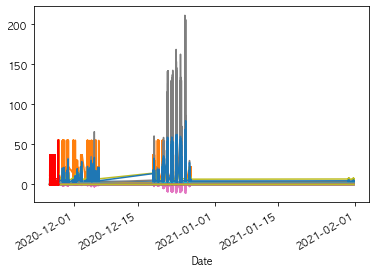

In [53]:
df_subset = df.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()